Required Libraries:

In [1]:
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import pandas as pd

## Introduction:

Company X manages the men's top professional basketball division
of the American league system.The dataset contains information on all the teams
that have participated in all the past tournaments. It has data about how many
baskets each team scored, conceded, how many times they came within the first
2 positions,how many tournaments they have qualified, their best position in the
past, etc.


 PROJECT OBJECTIVE: Company’s management wants to invest on proposals
on managing some of the best teams in the league. The analytics department
has been assigned with a task of creating a report on the performance shown by
the teams. Some of the older teams are already in contract with competitors.
Hence Company X wants to understand which teams they can approach which
will be a deal win for them.

ATTRIBUTE INFORMATION:
1. Team: Team’s name

2. Tournament: Number of played tournaments.

3. Score: Team’s score so far.

4. PlayedGames: Games played by the team so far.

5. WonGames: Games won by the team so far.

6. DrawnGames: Games drawn by the team so far.

7. LostGames: Games lost by the team so far.

8. BasketScored: Basket scored by the team so far.

9. BasketGiven: Basket scored against the team so far.

10. TournamentChampion: How many times the team was a champion of the
tournaments so far.

11. Runner-up: How many times the team was a runners-up of the tournaments
so far.

12. TeamLaunch: Year the team was launched on professional basketball.

13. HighestPositionHeld: Highest position held by the team amongst all the
tournaments played.

In [4]:
df = pd.read_csv('Basketball.csv')
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


# Data Cleaning

In [114]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [8]:
df.duplicated().sum() # No duplicate values

0

In [6]:
# Replacing '-' with Nan
for column in df.columns:
    df[column].replace('-', np.nan, inplace = True)

In [7]:
# Converting dtypes from object to float
for column in df.columns:
    if column != 'Team' and column != 'TeamLaunch':
        df[column] = df[column].astype(float)

In [38]:
df['TeamLaunch'] = df['TeamLaunch'].str[:4].astype(int)

# Descriptive Statistics: Understanding the Data

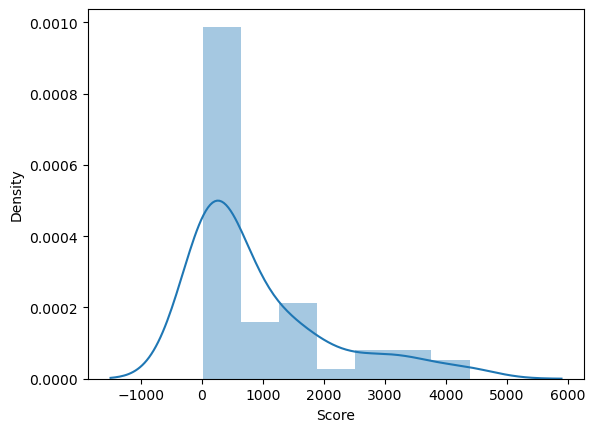

In [63]:
sns.distplot(df['Score'])
plt.show()

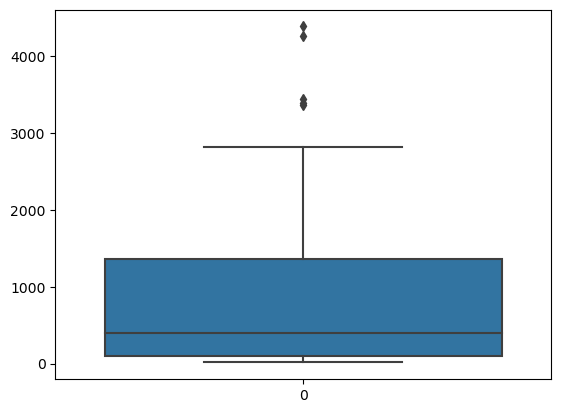

In [64]:
sns.boxplot(df['Score'])
plt.show()

In [ ]:
# Score column is Right Skewed meaning good performers are less.

In [39]:
df.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Lost_pct,Win_pct
count,61.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,9.000000,13.000000,61.000000,61.000000,60.000000,60.000000
mean,24.000000,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,9.666667,6.615385,1958.918033,7.081967,44.991949,31.364790
std,26.827225,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,11.618950,8.109033,27.484114,5.276663,8.400881,7.831199
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,1.000000,1.000000,1929.000000,1.000000,20.383780,16.666667
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,1.000000,1.000000,1935.000000,3.000000,41.142971,27.607494
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,6.000000,4.000000,1951.000000,6.000000,45.727107,30.491722
75%,38.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,10.000000,7.000000,1978.000000,10.000000,48.542449,33.540164
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,2017.000000,20.000000,70.000000,59.630702


In [ ]:
# Oldest Team was launched in 1929
# Newest Team was launched in 2017
# 75th Percentile is 1978
# As the older teams are already in contract with competitors, Let us consider Teams launched after 1980 as New Teams

In [42]:
nteams = df[df['TeamLaunch'] > 1980]
nteams

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Lost_pct,Win_pct
20,Team 21,17.0,970.0,646.0,266.0,172.0,208.0,892.0,789.0,NaN,1.0,1998,2.0,32.198142,41.176471
24,Team 25,12.0,553.0,456.0,147.0,112.0,197.0,520.0,633.0,NaN,NaN,2004,6.0,43.201754,32.236842
33,Team 34,9.0,293.0,346.0,96.0,92.0,158.0,291.0,489.0,NaN,NaN,1987,7.0,45.664740,27.745665
35,Team 36,7.0,277.0,270.0,76.0,76.0,118.0,320.0,410.0,NaN,NaN,1991,7.0,43.703704,28.148148
36,Team 37,6.0,242.0,228.0,62.0,56.0,110.0,244.0,366.0,NaN,NaN,2007,8.0,48.245614,27.192982
38,Team 39,4.0,190.0,160.0,52.0,45.0,63.0,199.0,241.0,NaN,NaN,1994,10.0,39.375000,32.500000
42,Team 43,4.0,148.0,152.0,37.0,37.0,78.0,155.0,253.0,NaN,NaN,1999,17.0,51.315789,24.342105
43,Team 44,3.0,132.0,114.0,35.0,27.0,52.0,139.0,167.0,NaN,NaN,2014,10.0,45.614035,30.701754
45,Team 46,3.0,96.0,114.0,26.0,44.0,44.0,101.0,139.0,NaN,NaN,1990,9.0,38.596491,22.807018
47,Team 48,2.0,83.0,80.0,20.0,23.0,37.0,62.0,117.0,NaN,NaN,1996,17.0,46.250000,25.000000


# Univariate Analysis

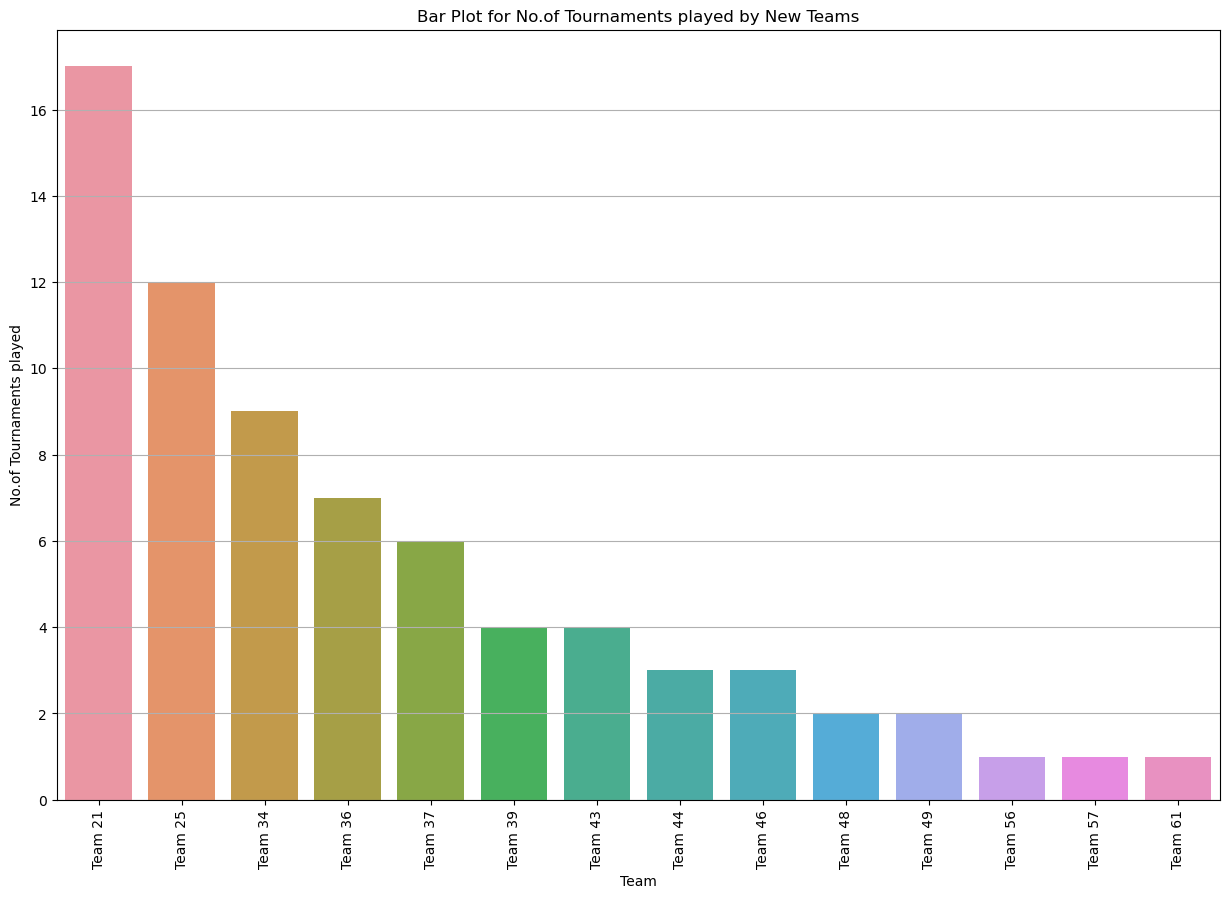

In [54]:
plt.figure(figsize= (15,10))
sns.barplot(x = nteams['Team'], y = nteams['Tournament'])
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Bar Plot for No.of Tournaments played by New Teams')
plt.ylabel('No.of Tournaments played')
plt.show()

In [ ]:
# Team21, Team25, Team34, Team36 and Team37 have played in more than 5 Tournaments, we can consider them as experienced teams

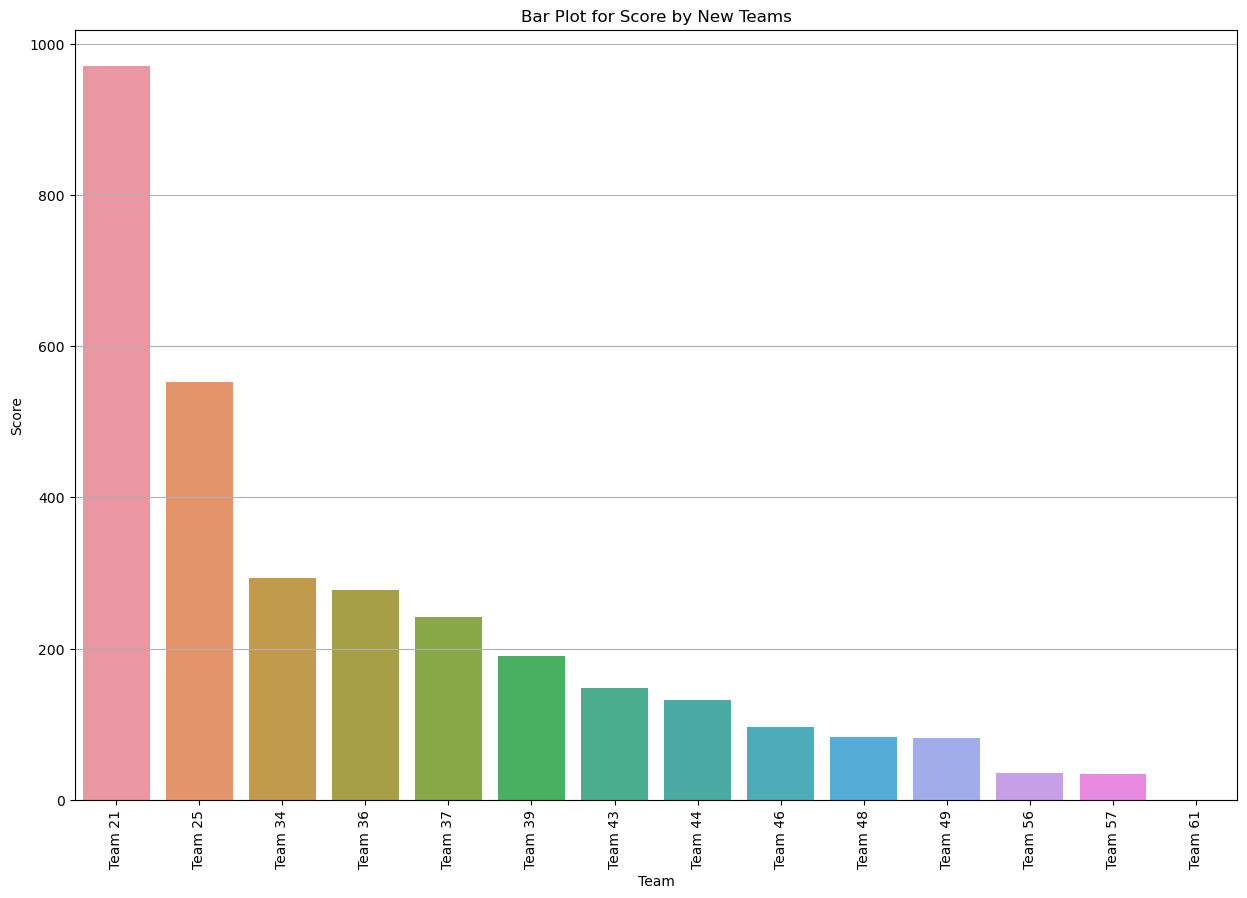

In [55]:
plt.figure(figsize= (15,10))
sns.barplot(x = nteams['Team'], y = nteams['Score'])
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Bar Plot for Score by New Teams')
plt.show()

In [ ]:
# Team21, Team25, Team34, Team36 and Team37 have score greater than 200, we can consider them as the best performers.

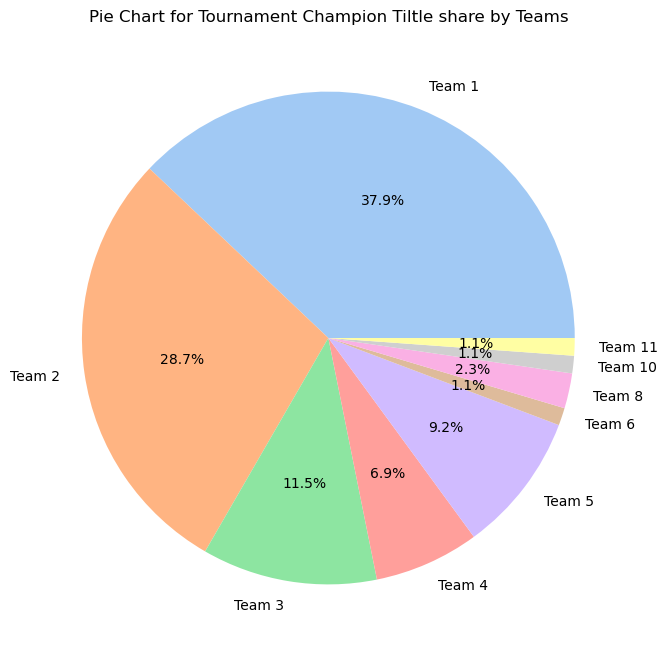

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(x = df[df['TournamentChampion'] > 0]['TournamentChampion'], labels=df[df['TournamentChampion'] > 0]['Team'], autopct='%1.1f%%', colors = sns.color_palette('pastel'))
plt.title('Pie Chart for Tournament Champion Tiltle share by Teams')
plt.show()

In [ ]:
# Team1, Team2, Team3, Team4 and Team5 are dominating the Tournament Champion Title being the Old Teams

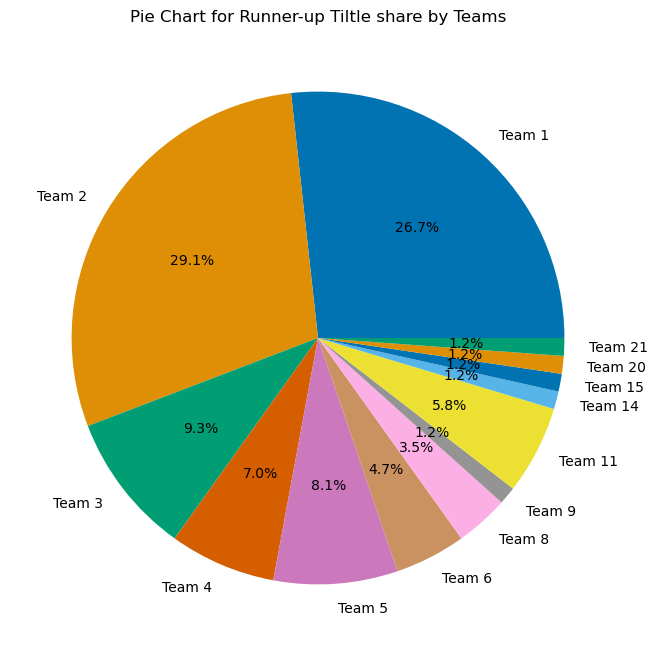

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(x = df[df['Runner-up'] > 0]['Runner-up'], labels=df[df['Runner-up'] > 0]['Team'], autopct='%1.1f%%', colors = sns.color_palette('colorblind'))
plt.title('Pie Chart for Runner-up Tiltle share by Teams')
plt.show()

In [ ]:
# Team1, Team2, Team3, Team4 and Team5 are dominating the Runner-up Tiltle
# Team21 being a new team have been a runner up

In [28]:
# Creating a column Win_pct
df['Win_pct'] = (df['WonGames'] / df['PlayedGames']) * 100
df['Win_pct']

0     59.630702
1     57.241130
2     47.475134
3     44.557057
4     43.772629
        ...    
56    21.052632
57    23.333333
58    23.333333
59    16.666667
60          NaN
Name: Win_pct, Length: 61, dtype: float64

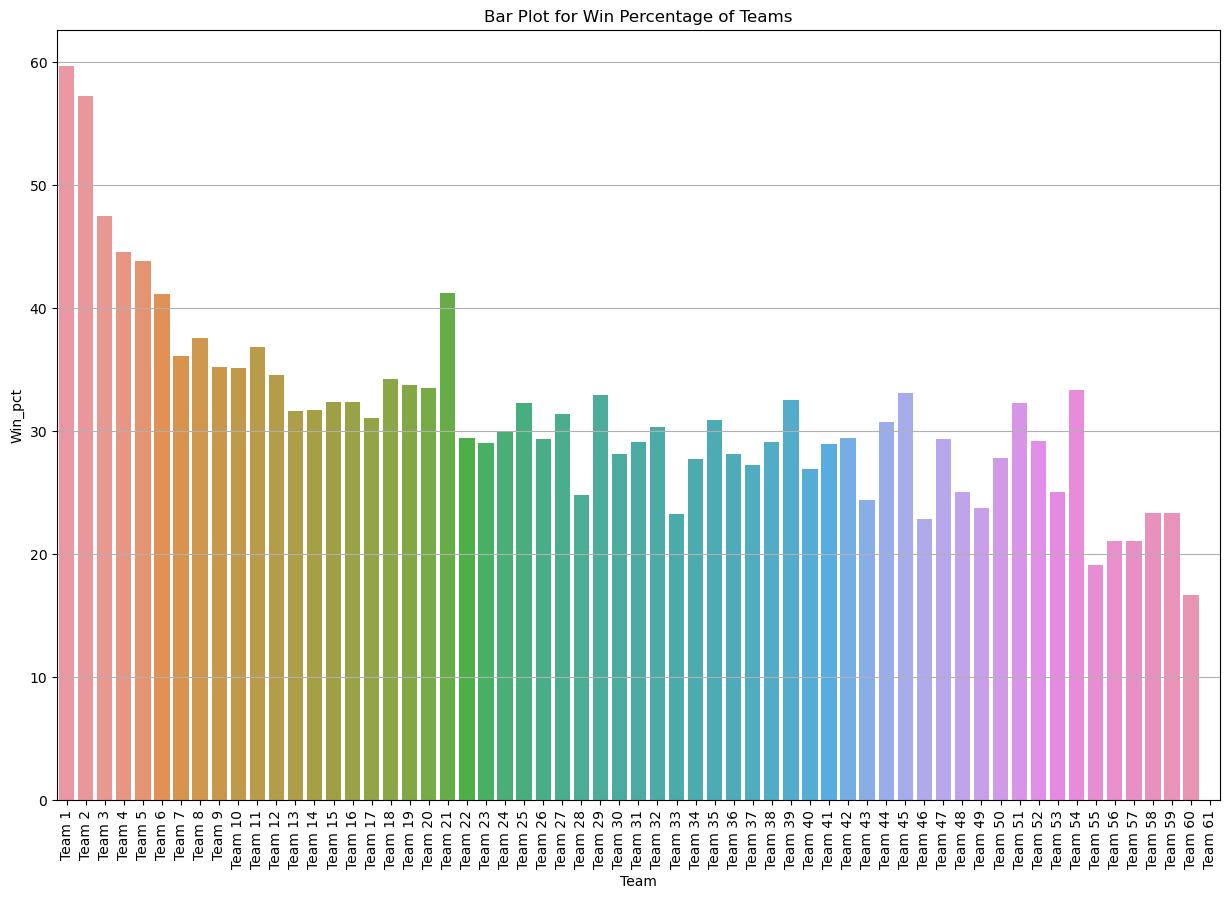

In [45]:
plt.figure(figsize= (15,10))
sns.barplot(x = df['Team'], y = df['Win_pct'])
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Bar Plot for Win Percentage of Teams')
plt.show()

In [ ]:
# We can see that Team1, Team2, Team3, Team4, Team5 and Team21 are the top 6 Teams by Win Percentage
# Team60, Team55, Team57, Team56 and Team46 are the Bottom 5 Teams by Win Percentage

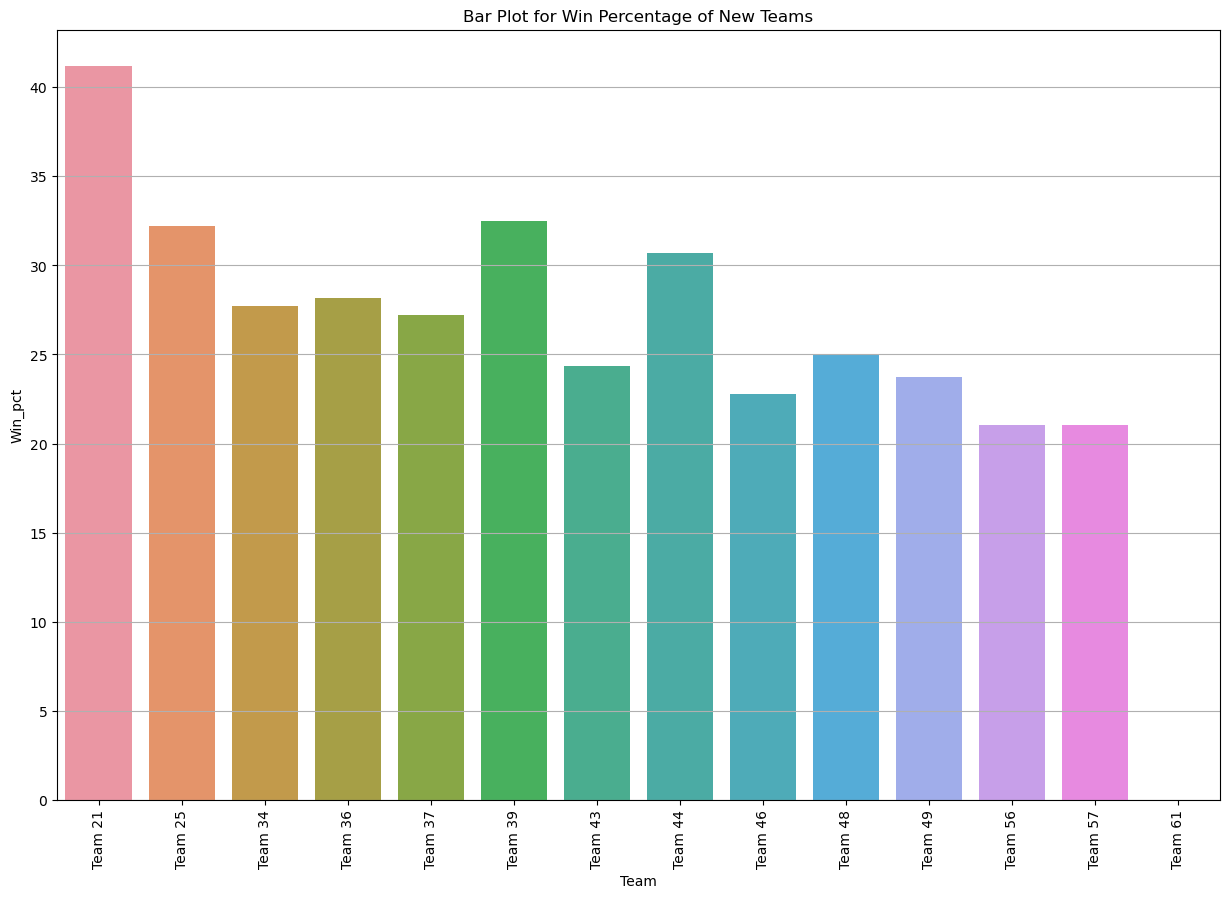

In [47]:
plt.figure(figsize= (15,10))
sns.barplot(x = nteams['Team'], y = nteams['Win_pct'])
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Bar Plot for Win Percentage of New Teams')
plt.show()

In [ ]:
# Team21, Team25, Team39 and Team44 are the top 4 new teams by win pct.

In [61]:
df[(df['HighestPositionHeld'] <= 7) & (df['TeamLaunch'] > 1980)]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Lost_pct,Win_pct
20,Team 21,17.0,970.0,646.0,266.0,172.0,208.0,892.0,789.0,NaN,1.0,1998,2.0,32.198142,41.176471
24,Team 25,12.0,553.0,456.0,147.0,112.0,197.0,520.0,633.0,NaN,NaN,2004,6.0,43.201754,32.236842
33,Team 34,9.0,293.0,346.0,96.0,92.0,158.0,291.0,489.0,NaN,NaN,1987,7.0,45.664740,27.745665
35,Team 36,7.0,277.0,270.0,76.0,76.0,118.0,320.0,410.0,NaN,NaN,1991,7.0,43.703704,28.148148


In [ ]:
# Team21, Team25, Team34 and Team36 being new teams have held atmost top 7 position

# Bivariate Analysis

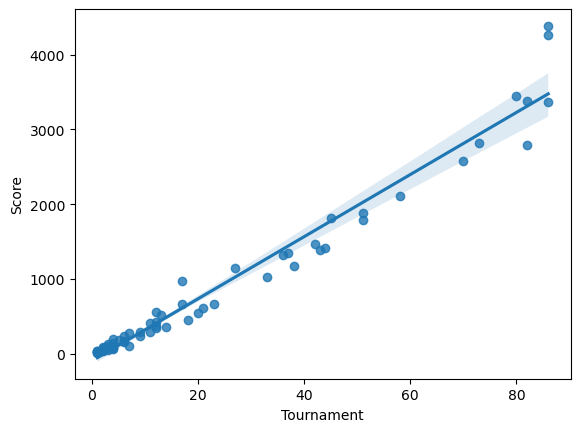

In [68]:
sns.regplot(x = df['Tournament'], y = df['Score'])
plt.show()

In [ ]:
# We can observe few outliers in the top, indicating that as the No. of Tournaments increases, scores increases non linearly
# with this we can conclude that, teams with more No. of Tournaments are more preferable

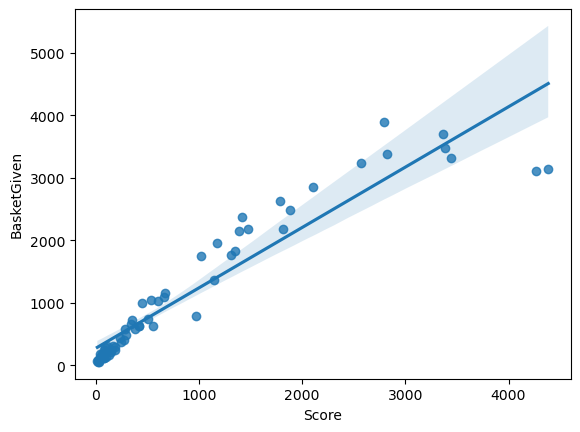

In [71]:
sns.regplot(y = df['BasketGiven'], x = df['Score'])
plt.show()

In [ ]:
# We can observe few outliers in the right, indicating that as the Score increases, BasketGiven decreases non linearly
# with this we can conclude that, teams with less BasketGiven are more preferable